### Face regognition algorithms comparision

In [106]:
import matplotlib.pyplot as plt
import cv2
from facenet_pytorch import MTCNN
from torchvision import transforms
import torch
import numpy as np

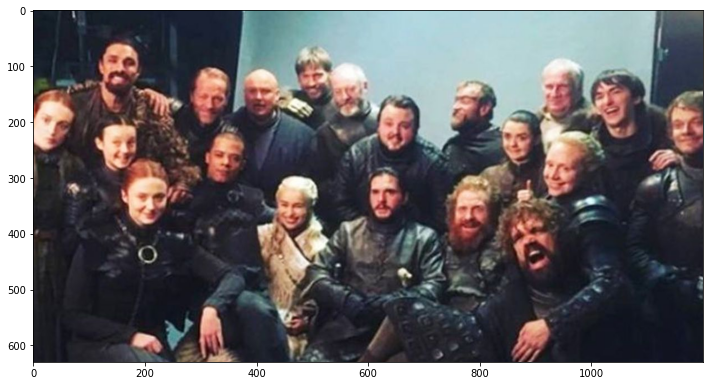

In [131]:
img = cv2.imread('got.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.show()

### Cascade Classifiers
- Cascade classifiers uses boosting technique to select relevent features extracted from viola-Jones filters to detect faces.
- In order to boost the computation of rectangle features integral images are used.

##### scale-factor: Predictions are done at different scaled sizes of image, this factor controlls the rate of scaling after each stage
##### min-neighbors: number of neighboring rectangles to be considered to decide if a rectangle has a face.

In [113]:
#### load default parameters file
cascPath = "../usr/local/lib/python3.8/site-packages/cv2/data/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

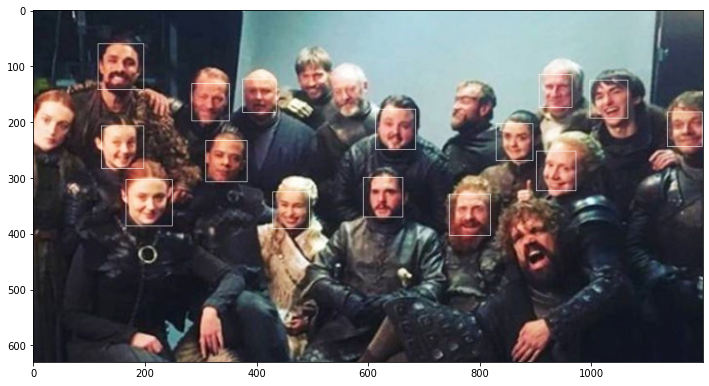

In [132]:
img1 = img.copy()
faces = faceCascade.detectMultiScale(
img1,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)
# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 255, 255), 1)

plt.figure(figsize=(12,8))
plt.imshow(img1, cmap='gray')
plt.show()

### MTCNN face detector

<ipython-input-133-fad59d80efb9>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.rectangle(img2, (x1, y1), (x2, y2), (255, 255, 255), 1)


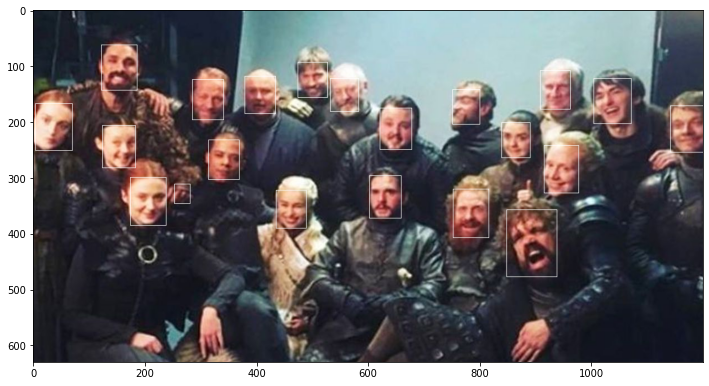

In [133]:
img2 = img.copy()
mtcnn = MTCNN()
faces = mtcnn.detect(img2)
for (x1, y1, x2, y2) in faces[0]: 
    # Draw rectangle around the face
    cv2.rectangle(img2, (x1, y1), (x2, y2), (255, 255, 255), 1)
plt.figure(figsize=(12,8))
plt.imshow(img2, cmap='gray')
plt.show()

In [169]:
x1, y1, x2, y2 = faces[0][0]

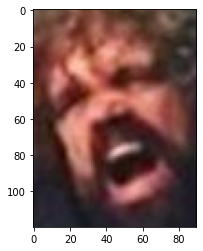

In [170]:
plt.imshow(img[int(y1):int(y2),int(x1):int(x2),:])

In [171]:
img[int(y1):int(y2),int(x1):int(x2),:].shape

(120, 90, 3)

In [186]:
mtcnn = MTCNN(keep_all=True)

In [188]:
faces = mtcnn(img2)